# 18支亚洲球队聚类

In [2]:
# Team cluster hierarchy

from scipy.cluster.hierarchy import dendrogram, ward
#from sklearn.cluster.AgglomerativeClustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 数据加载
data = pd.read_csv('../resource/team_cluster_data.csv', encoding='gbk')
train_x = data[["2019国际排名","2018世界杯排名","2015亚洲杯排名"]]
kmeans = KMeans(n_clusters=3)

In [5]:
# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
#print(train_x)

In [6]:
# kmeans 算法
model = AgglomerativeClustering(linkage='ward', n_clusters=3)
y = model.fit_predict(train_x)
print(y)

[2 1 1 1 1 2 0 2 2 0 0 0 0 0 1 0 0 0]


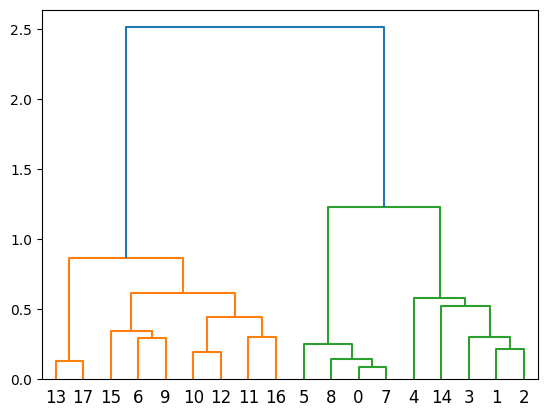

In [7]:
linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.show()


In [ ]:
# Team cluster kmeans
# coding: utf-8
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np
# 数据加载
data = pd.read_csv('team_cluster_data.csv', encoding='gbk')
train_x = data[["2019国际排名","2018世界杯排名","2015亚洲杯排名"]]
kmeans = KMeans(n_clusters=3)
# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
#print(train_x)
# kmeans 算法
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print(result)
# 将结果导出到CSV文件中
#result.to_csv("team_cluster_result.csv")
